## 해쉬 테이블 (Hash Table)
### 해쉬 구조란?
- 키(Key)와 값(Value)쌍으로 이루어진 데이터 구조를 의미합니다. Key를 이용하여 데이터를 찾으므로, 속도를 빠르게 만드는 구조입니다.
- 파이썬에서는 딕셔너리(Dictionary) 타입이 해쉬 테이블과 같은 구조입니다.
- 기본적으로는, 배열로 미리 Hash Table 크기만큼 생성해서 사용합니다. 공간은 많이 사용하지만, 시간은 빠르다는 장점이 있습니다.
- 검색이 많이 필요한 경우, 저장, 삭제, 읽기가 많은 경우, 캐쉬를 구현할 때 주로 사용됩니다.

>장점<br>
데이터 저장/검색 속도가 빠릅니다.<br>
해쉬는 키에 대한 데이터가 있는지(중복) 확인이 쉽습니다.<br>

>단점<br>
일반적으로 저장공간이 좀더 많이 필요합니다.<br>
여러 키에 해당하는 주소가 동일할 경우 충돌을 해결하기 위한 별도 자료구조가 필요합니다. (충돌 해결 알고리즘)<br>

>시간 복잡도<br>
일반적인 경우(충돌이 없는 경우): O(1)<br>
최악의 경우(모든 경우에 충돌이 발생하는 경우): O(n)<br>

### 용어
- 해쉬(Hash): 임의 값을 고정 길이로 변환하는 것을 의미합니다.
- 해쉬 함수(Hash Function): 특정 연산을 이용하여 키 값을 받아서 value를 가진 공간의 주소로 바꾸어주는 함수를 의미합니다.
- 해쉬 테이블(Hash Table): 해쉬 구조를 사용하는 데이터 구조입니다.
- 해쉬 값(해쉬 주소, Hash Value or Address): Key값을 해쉬 함수에 넣어서 얻은 주소값을 의미합니다. 이 값을 통해 슬롯을 찾아간다.
- 슬롯(Slot): 한 개의 데이터를 저장할 수 있는 공간을 의미합니다. (아래 그림에서는 bucket)
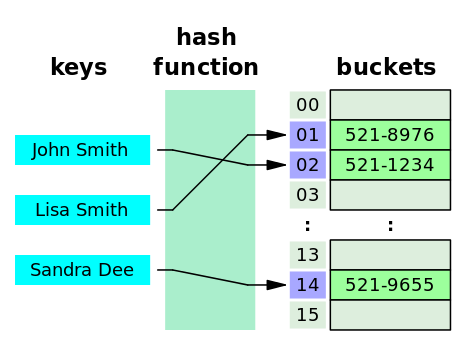

### 해쉬 함수와 키 생성 함수
키 생성 함수를 해당 포스팅에서는 파이썬 기본라이브러리의 hash()함수를 사용할 것입니다. 해당 함수는 실행마다 값이 달라질 수 있습니다. 사실, 해쉬 함수는 보안 분야에서 많이 사용됩니다. 예를 들어 SHA(Secure Hash Algorithm)은 어떤 데이터도 고정된 크기의 유일한 값으로 리턴해주기 때문에 많이 사용됩니다.

- SHA-1

>SHA-1은 해쉬값의 크기를 160으로 고정하는 알고리즘입니다.

In [4]:
import hashlib

data = 'test'.encode()
print(data)
hash_object= hashlib.sha1()
hash_object.update(data)
hex_dig = hash_object.hexdigest()
print(hex_dig)

b'test'
a94a8fe5ccb19ba61c4c0873d391e987982fbbd3


- SHA-256

>위의 SHA-1에서 해쉬값의 크기를 256으로 늘려서 더 안전한 알고리즘입니다. 위의 메소드에서 sha1()대신 sha256()을 사용하면 됩니다.

In [5]:
import hashlib

data = 'test'.encode()
print(data)
hash_object= hashlib.sha256()
hash_object.update(data)
hex_dig = hash_object.hexdigest()
print(hex_dig)

b'test'
9f86d081884c7d659a2feaa0c55ad015a3bf4f1b2b0b822cd15d6c15b0f00a08


### [문제] 리스트로 해쉬 테이블 만들기

값이 해쉬 테이블에 저장되도록 코드 작성

In [10]:
class HashTable: 
    size = 8
    
    def __init__(self): 
        self.hash_table = list([0 for i in range(self.size)]) 
        
    def hash_function(self, key): 
        return key % self.size 
    
    def insert(self, key, value): 
        hash_value = self.hash_function(hash(key)) 
        self.hash_table[hash_value] = value 
        
    def read(self, key): 
        hash_value = self.hash_function(hash(key)) 
        return self.hash_table[hash_value] 
    
    def print(self): 
        print(self.hash_table)

해당 테이블의 해쉬 함수는 간단하게 key % 8 로 설정하였고, 해당 해쉬테이블의 공간은 8자리입니다. 0으로만 이루어진 리스트가 가장 먼저 생성이됩니다. 해쉬 키를 생성하는 것은 파이썬 기본 라이브러리의 hash함수를 사용하였습니다. insert함수를 통해 key, value쌍을 넣을 수 있고, read를 통해 key값을 이용하여 value값을 얻을 수 있습니다. (이때 기본 라이브러리 hash함수는 랜덤 연산작용으로, 실행시 마다 값이 달라집니다.)

In [12]:
ht = HashTable() 
ht.insert(1, 'a')
ht.print()
ht.insert(2, 'moon')
ht.print()
ht.insert(2, 'b')
ht.print()
ht.insert(3, 'c')
ht.print()
print(ht.read(2))
ht.insert(4, 'd')
ht.print()

[0, 'a', 0, 0, 0, 0, 0, 0]
[0, 'a', 'moon', 0, 0, 0, 0, 0]
[0, 'a', 'b', 0, 0, 0, 0, 0]
[0, 'a', 'b', 'c', 0, 0, 0, 0]
b
[0, 'a', 'b', 'c', 'd', 0, 0, 0]


해당 해쉬테이블에는 문제점이 있습니다. (2, 'moon')쌍이 삭제를 안함에도 불구하고, (2, 'b')쌍이 들어가자 없어진 것입니다. hash의 계산 값이 겹쳐져서 이러한 충돌(Collision)이 발생한 것입니다.

### 리스트로 만든 개선된 해쉬테이블(충돌 해결 알고리즘)
위의 문제를 해결하기 위한 방법으로 크게 3가지의 개선 기법이 존재합니다.

1. Chaining 기법


- Open Hashing 기법 중 하나: 해쉬테이블 저장공간 외에 공간을 더 추가해서 사용하는 방법입니다.

- 충돌이 발생시, 링크드 리스트로 데이터를 추가로 뒤에 연결시키는 방법입니다.

In [14]:
class HashTable: 
    size = 8
    
    def __init__(self): 
        self.hash_table = list([0 for i in range(self.size)]) 
        
    def hash_function(self, key):
        return key % self.size 
    
    def insert(self, key, value): 
        gen_key = hash(key) 
        hash_value = self.hash_function(gen_key) 
        if self.hash_table[hash_value] != 0: 
            # 해당 hash value index를 이미 사용하고 있는 경우(충돌 시) 
            for i in range(len(self.hash_table[hash_value])): 
                # 이미 같은 키 값이 존재하는 경우 -> value 교체 
                # 이때 0은 key, 1은 value값이 존재하는 인덱스 
                if self.hash_table[hash_value][i][0] == gen_key: 
                    self.hash_table[hash_value][i][1] = value 
                    return 
            # 같은 키 값이 존재하지 않는 경우에는 [key, value]를 해당 인덱스에 삽입 
            self.hash_table[hash_value].append([gen_key, value]) 
        else: 
            # 해당 hash_value를 사용하고 있지 않는 경우 
            self.hash_table[hash_value] = [[gen_key, value]] 
            
    def read(self, key): 
        gen_key = hash(key) 
        hash_value = self.hash_function(gen_key)
        
        if self.hash_table[hash_value] != 0: 
            # 해당 해쉬 값 index에 데이터가 존재할 때, 
            for i in range(len(self.hash_table[hash_value])): 
                if self.hash_table[hash_value][i][0] == gen_key: 
                    # 키와 동일할 경우 -> 해당 value return 
                    return self.hash_table[hash_value][i][1] 
            # 동일한 키가 존재하지 않으면 None return 
            return None 
        else: 
            # 해당 해쉬 값 index에 데이터가 없을 때, 
            return None 
        
    def print(self): 
        print(self.hash_table)

해당 코드에서는 해쉬 값이 같은 자리에는 리스트를 만들어서 추가하는 방식으로 구현하였고, 또한 리스트에는 key값과 value를 넣어서 구현하였습니다.

위에서 사용했었던 확인을 해보면 아래와 같은 결과가 나옵니다.

### 2. Linear Probing 기법

- Close Hashing 기법 중 하나: 해쉬테이블 저장공간 안에서 충돌 문제를 해결하는 방법입니다.

- 충돌이 일어나면, 해당 hash value(hash address)의 다음 index부터 맨 처음 나오는 빈공간에 저장하는 기법입니다. (저장 공간 활용도의 증가)



출처: https://davinci-ai.tistory.com/19 [DAVINCI - AI]

In [15]:
class HashTable: 
    def __init__(self): 
        self.hash_table = list([0 for i in range(8)]) 
        
    def hash_function(self, key): # Custom Hash Function 
        return key % 8 
    
    def insert(self, key, value): 
        gen_key = hash(key) 
        hash_value = self.hash_function(gen_key) 
        if self.hash_table[hash_value] != 0: 
            # 해당 hash value index를 이미 사용하고 있는 경우(충돌 시) 
            for i in range(hash_value, len(self.hash_table)): 
                # 해당 hash value index부터 마지막 index까지 
                # 돌면서 비어있거나 key가 같은 값을 찾는다. 
                if self.hash_table[i] == 0: 
                    # 해당 인덱스가 비어있을 때, 
                    self.hash_table[i] = [gen_key, value] 
                    return 
                elif self.hash_table[i][0] == gen_key: 
                    # 이미 같은 키 값이 존재하는 경우 덮어쓰기 
                    self.hash_table[i][1] = value 
                    return 
                else: 
                    # 해당 hash_value를 사용하고 있지 않는 경우 
                    self.hash_table[hash_value] = [gen_key, value] 
                    
    def read(self, key): 
        gen_key = hash(key) 
        hash_value = self.hash_function(gen_key) 
        if self.hash_table[hash_value] != 0: 
            # 해당 해쉬 값 index에 데이터가 존재할 때, 
            for i in range(hash_value, len(self.hash_table)): 
                if self.hash_table[i] == 0: 
                    # 비어있는 경우, 
                    return None 
                elif self.hash_table[i][0] == gen_key: 
                    # 키와 동일할 경우 -> 해당 value return 
                    return self.hash_table[i][1] 
                else: # 해당 해쉬 값 index에 데이터가 없을 때, 
                    return None 
                
    def print(self): 
        print(self.hash_table)

### 3. 공간을 확장하는 방법

2번에서 사용한 Linear Probing 방식에서 공간을 늘린다면 1번에 비해 균형적인 구조로 사용이 가능합니다.

In [17]:
class HashTable: 
    def __init__(self, n): 
        self.n = n 
        self.hash_table = list([0 for i in range(n)]) 
        
    def hash_function(self, key): # Custom Hash Function 
        return key % self.n